In [1]:
!mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:54<00:00, 21.1MB/s]
100% 1.06G/1.06G [00:54<00:00, 21.0MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/dogs-vs-cats.zip' mode='r'>>

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [5]:
#generators -create batches
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [8]:
# Normalize

def process(image, labels):
  image = tf.cast(image/255., tf.float32)
  return image, labels
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [9]:
# lets create a CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape= (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu', input_shape= (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu', input_shape= (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [10]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [13]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 77s 108ms/step - loss: 1.1923 - accuracy: 0.5512 - val_loss: 8.4817 - val_accuracy: 0.5466
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.6454 - accuracy: 0.6303 - val_loss: 197.4151 - val_accuracy: 0.5004
Epoch 3/10
625/625 [==============================] - 65s 103ms/step - loss: 0.5516 - accuracy: 0.7184 - val_loss: 217.4349 - val_accuracy: 0.5074
Epoch 4/10
625/625 [==============================] - 66s 104ms/step - loss: 0.4658 - accuracy: 0.7800 - val_loss: 55.8525 - val_accuracy: 0.6300
Epoch 5/10
625/625 [==============================] - 65s 104ms/step - loss: 0.3954 - accuracy: 0.8193 - val_loss: 52.7939 - val_accuracy: 0.6254
Epoch 6/10
625/625 [==============================] - 65s 104ms/step - loss: 0.3257 - accuracy: 0.8579 - val_loss: 75.8501 - val_accuracy: 0.5724
Epoch 7/10
625/625 [==============================] - 66s 105ms/step - loss: 0.2528 - accuracy: 0.8917 - val_loss: 62.2501 

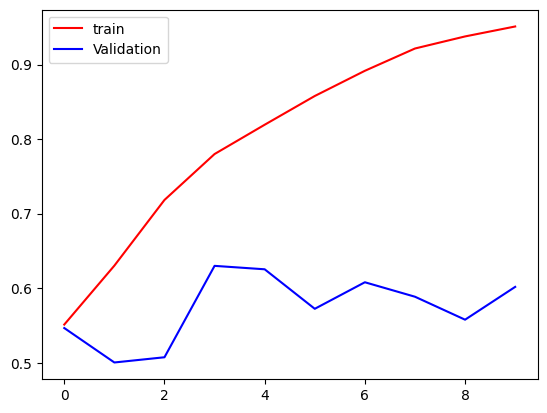

In [16]:
#Previous Output:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='Validation')
plt.legend()
plt.show()

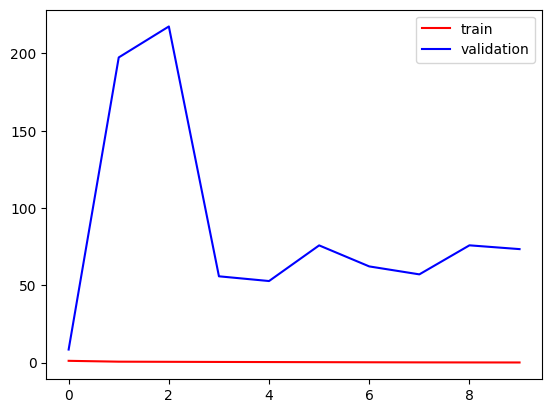

In [18]:
#After adding BatchNormalization and Dropout layer:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()


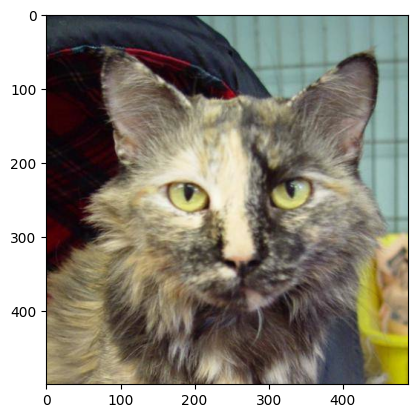

In [21]:
#test the model
import cv2
import matplotlib.pyplot as plt

test_image_path = '/content/test/cats/cat.10.jpg'  # Path to your test image
test_image = cv2.imread(test_image_path)

if test_image is None:
    print(f"Error: Could not read image from {test_image_path}. Check if the file exists and is a valid image.")
else:
    plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))  # Convert from BGR (OpenCV) to RGB (Matplotlib)
    plt.show()


In [23]:
test_image.shape


(499, 489, 3)

In [24]:
test_image=cv2.resize(test_image,(256,256))

test_input=test_image.reshape((1,256,256,3))

model.predict(test_input)

1/1 [==============================] - 1s 549ms/step


array([[0.]], dtype=float32)

In [25]:

test_image = cv2.imread('/content/test/dogs/dog.100.jpg')

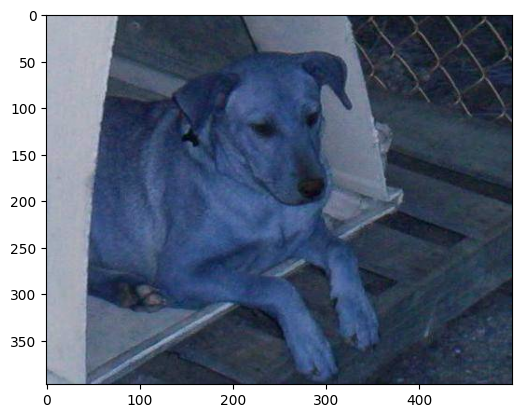

In [26]:

plt.imshow(test_image)

In [27]:
test_image.shape

(397, 500, 3)

In [28]:
test_image=cv2.resize(test_image,(256,256))

test_input=test_image.reshape((1,256,256,3))

model.predict(test_input)

1/1 [==============================] - 0s 59ms/step


array([[0.]], dtype=float32)